In [5]:
pip install pandas matplotlib


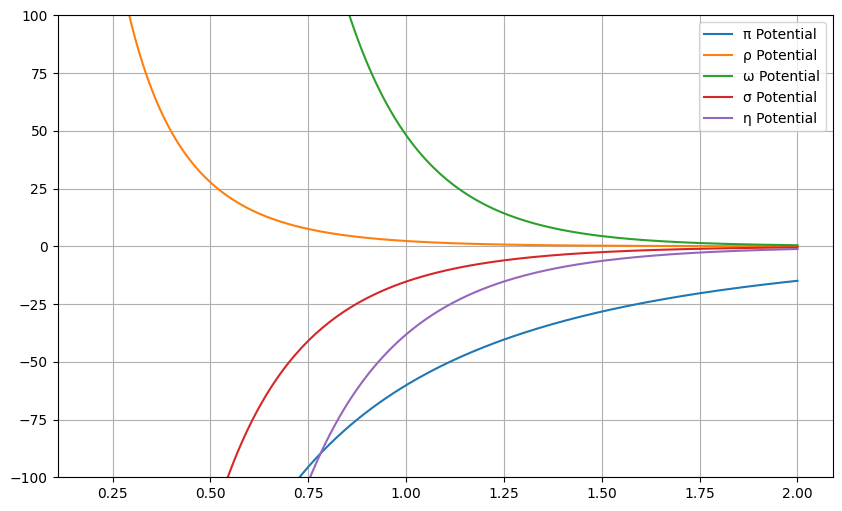

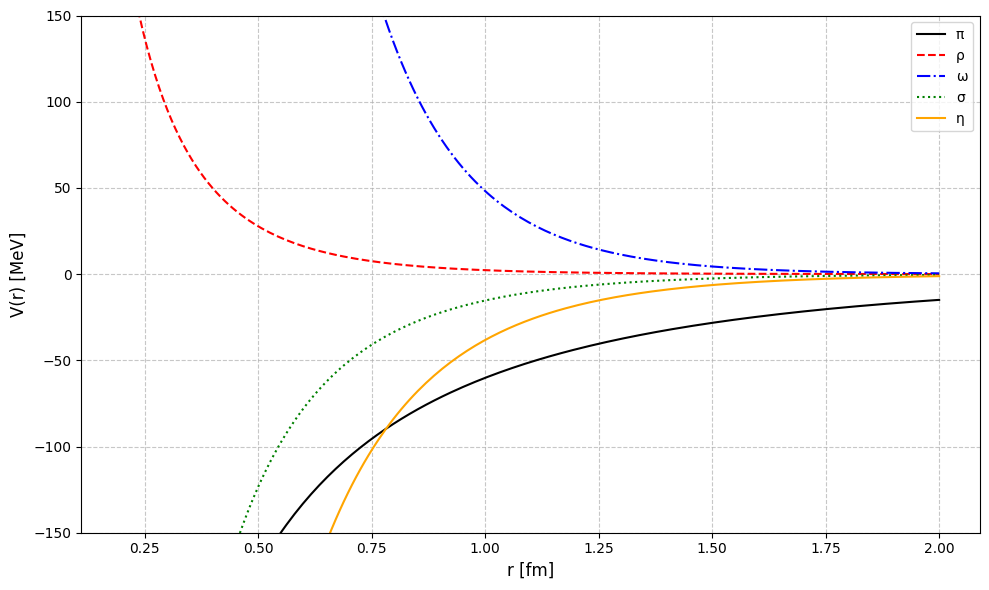

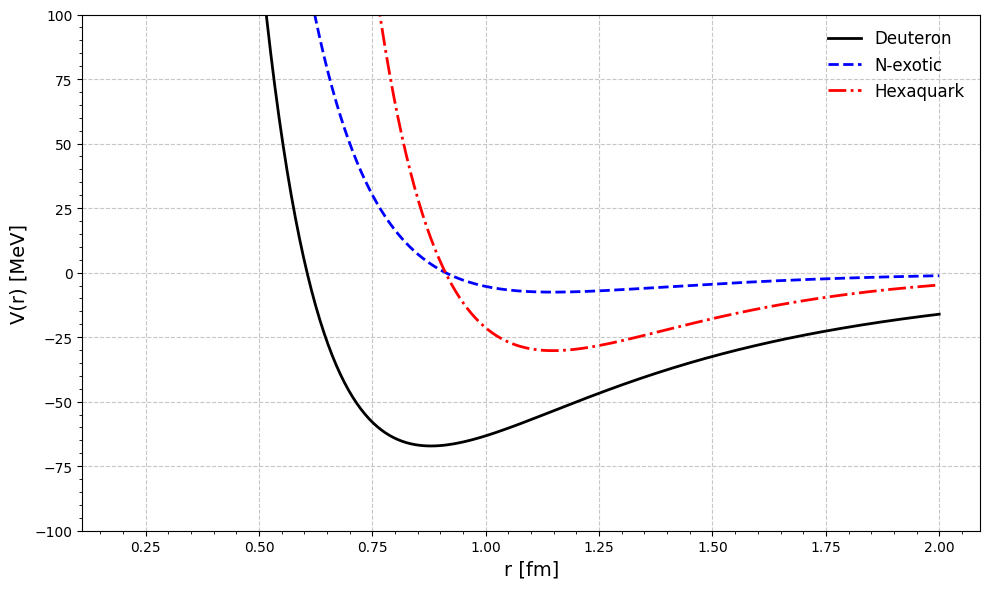

Deuteron Potential at r = 1.46 fm: -34.4405812579856 MeV
hexaquark Potential at r = 1.105 fm: -29.695126847692393 MeV


In [6]:
import matplotlib.pyplot as plt
import scipy.constants as constants
from scipy.constants import c, hbar
import numpy as np

# Constants
hbarc = 197.327  # MeV fm
m_pi = 138  # MeV (pion mass)
m_rho = 712  # MeV (rho meson mass)
m_omega = 782.8  # MeV (omega meson mass)
m_sigma = 550  # MeV (sigma meson mass)
m_eta = 548.5   # MeV (sigma meson mass)


#Nucleon coupling
g_pi = 14.17
g_rho = 0.37
g_omega = 9.25
g_sigma = 1.83
g_eta = 4.56

#Hexaquark coupling
g_hex_sigma = g_sigma*4
g_hex_omega = g_omega*4
g_hex_eta = g_eta*4

M_p = 938 #mass of proton
M_hex = 1190 # mass of hexaquark
range_convert = (1e15*6.582119569*10**(-22)/(2*c))
mass_convert = (2*c/1e-15*6.582119569*10**(-22))


# Function for Yukawa potential
def yukawa_potential_holinde(r, mass_exch, mass_bound, coupling):
    return 24*(hbarc * coupling * mass_exch**2 / (4 * mass_bound**2 * 3 * r ) * np.exp(-mass_exch * r / hbarc))


# Function for the total potential
def deuteron_potential(r):
    V_pi = yukawa_potential_holinde(r, m_pi, M_p, g_pi)
    V_rho = yukawa_potential_holinde(r, m_rho,M_p, g_rho)
    V_omega = yukawa_potential_holinde(r, m_omega,M_p, g_omega)
    V_sigma = yukawa_potential_holinde(r, m_sigma, M_p, g_sigma)
    V_eta = yukawa_potential_holinde(r, m_eta, M_p,g_eta)
    return (-V_pi + V_rho + V_omega - V_sigma - V_eta)


def exotic_potential(r):
    V_omega = yukawa_potential_holinde(r, m_omega, M_p,g_omega)
    V_sigma = yukawa_potential_holinde(r, m_sigma, M_p,g_sigma)
    V_eta = yukawa_potential_holinde(r, m_eta, M_p,g_eta)
    return + V_omega - V_sigma - V_eta

def hexaquark_potential(r):
    V_omega = yukawa_potential_holinde(r, m_omega, M_p,g_hex_omega)
    V_sigma = yukawa_potential_holinde(r, m_sigma, M_p,g_hex_sigma)
    V_eta   = yukawa_potential_holinde(r, m_eta, M_p,g_hex_eta)
    return + V_omega - V_sigma - V_eta

# Distance range
r = np.linspace(0.2, 2.0, 200)  # fm

# Calculate potential
V_deuteron = deuteron_potential(r)
V_pi = yukawa_potential_holinde(r, m_pi, M_p,g_pi)
V_rho = yukawa_potential_holinde(r, m_rho, M_p,g_rho)
V_omega = yukawa_potential_holinde(r, m_omega, M_p,g_omega)
V_sigma = yukawa_potential_holinde(r, m_sigma, M_p,g_sigma)
V_eta = yukawa_potential_holinde(r, m_eta, M_p,g_eta)

V_hexaquark = hexaquark_potential(r)
V_N_exotic = exotic_potential(r)


# Plotting all on one graph
plt.figure(figsize=(10, 6))


plt.plot(r, -V_pi, label='π Potential')
plt.plot(r, V_rho, label='ρ Potential')
plt.plot(r, V_omega, label='ω Potential')
plt.plot(r, -V_sigma, label='σ Potential')
plt.plot(r, -V_eta, label='η Potential')
plt.grid(True)
plt.legend()
plt.ylim(-100, 100)
# plt.show()


# Plotting all on one graph
fig, ax = plt.subplots(figsize=(10, 6))


ax.plot(r, -V_pi, label='π', linestyle='-', color='black')
ax.plot(r, V_rho, label='ρ', linestyle='--', color='red')
ax.plot(r, V_omega, label='ω', linestyle='-.', color='blue')
ax.plot(r, -V_sigma, label='σ', linestyle=':', color='green')
ax.plot(r, -V_eta, label='η', linestyle='-', color='orange')

ax.set_xlabel('r [fm]', fontsize=12)
ax.set_ylabel('V(r) [MeV]', fontsize=12)

ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(fontsize=10, loc='best')
ax.set_ylim(-150, 150)

plt.tight_layout()
plt.savefig('individual_potentials.png', format='png')
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))

# Plot the potentials with improved styling
ax.plot(r, V_deuteron, label='Deuteron', linestyle='-', color='black', linewidth=2)
ax.plot(r, V_N_exotic, label=r'N-exotic', linestyle='--', color='blue', linewidth=2)  # Use raw string for LaTeX
ax.plot(r, V_hexaquark, label='Hexaquark', linestyle='-.', color='red', linewidth=2)

# Customize plot elements
ax.set_xlabel('r [fm]', fontsize=14)  # Increase label font size
ax.set_ylabel('V(r) [MeV]', fontsize=14)
ax.set_ylim(-100, 100)  # Set y-axis limits

# Improve grid and legend
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(fontsize=12, loc='best', frameon=False)  # Remove legend frame

# Add minor ticks for better precision
ax.minorticks_on()

# Tighten layout and save as PDF
plt.tight_layout()
plt.savefig('holinde_potential.png', format='png')  # Use a descriptive file name
plt.show()
radius_of_interest_deuteron = 1.46 # fm
radius_of_interest_hexaquark =  1.105
potential_deuteron = deuteron_potential(radius_of_interest_deuteron)
potential_hex = hexaquark_potential(radius_of_interest_hexaquark)

print(f"Deuteron Potential at r = {radius_of_interest_deuteron} fm: {potential_deuteron} MeV")
print(f"hexaquark Potential at r = {radius_of_interest_hexaquark} fm: {potential_hex} MeV")


#Square well approximations

In [7]:
from scipy import optimize
from scipy.optimize import fsolve
from scipy.optimize import fmin

#minimal well depth calucltaion from well position

print("Deuteron max well depth")
print(fmin(deuteron_potential, x0 =0.0))
min_deuteron = fmin(deuteron_potential, x0 =0.0)

deuteron_well_depth = deuteron_potential(min_deuteron)
print(deuteron_potential(min_deuteron))


#Take the accepted vaue of -35MeV for qua[0.8790625]re well potential to find alpha:
# ratio of the max well depth to potrential value for interaction to bound state
alpha = 0.77 /(min_deuteron)

print("alpha =", alpha)


Deuteron max well depth
Optimization terminated successfully.
         Current function value: -67.162899
         Iterations: 25
         Function evaluations: 50
[0.8790625]
Optimization terminated successfully.
         Current function value: -67.162899
         Iterations: 25
         Function evaluations: 50
[-67.16289906]
alpha = [0.87593317]


<ipython-input-6-2afecbe94a72>:35: RuntimeWarning: divide by zero encountered in divide
  return 24*(hbarc * coupling * mass_exch**2 / (4 * mass_bound**2 * 3 * r ) * np.exp(-mass_exch * r / hbarc))
<ipython-input-6-2afecbe94a72>:45: RuntimeWarning: invalid value encountered in add
  return (-V_pi + V_rho + V_omega - V_sigma - V_eta)


#Plot Square well

Plot square well approx from known width of solution and a symmertical square well

0.7701257256169741


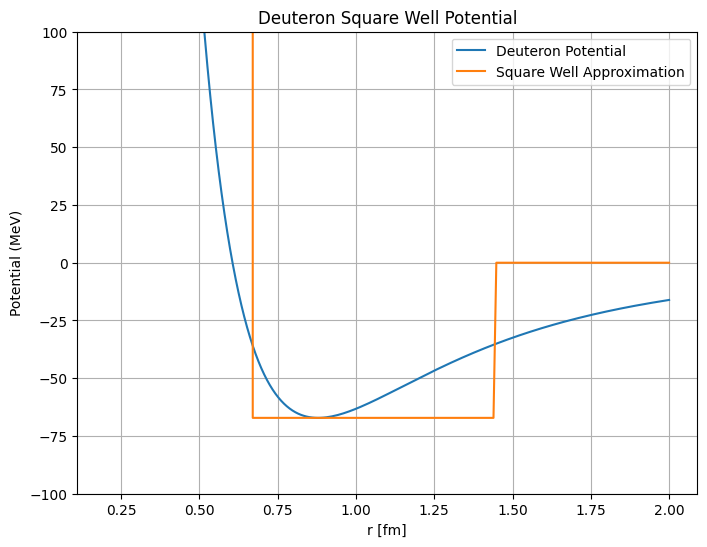

-35.500000000000014
alpha = [0.52856563]
sol1 1.439404174178264 val -35.49999999999987
sol2 0.6692784485612898 val -35.49999999999987


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the potential function for the square well
def square_well_potential(r, V0, a, c):
    V = np.zeros_like(r)
    V[ r <= a] = 1000000
    V[(a < r) & (r < (a + c))] = V0  # Potential inside the well
    V[r >= c] = 0.0   # Potential outside the well (right barrier 0)
    return V

# Parameters for the square well
V0 = deuteron_well_depth  # Depth of the well in MeV

#Well of width 0.77fm, known to be sol for this depth (analytical calc)
c = 1.44
a = 0.67

line_y = np.full(r.shape, -35.5)  # Create an array of -50 with the same shape as r

potential = square_well_potential(r, V0, a, c)
# Plotting the potential
plt.figure(figsize=(8, 6))
#plt.plot(r, line_y, label = 'Line')
plt.plot(r, V_deuteron, label='Deuteron Potential')
plt.plot(r, potential, label = 'Square Well Approximation')
#plt.plot(r, V_deuteron, label='Deuteron Potential'
plt.xlabel('r [fm]')
plt.ylabel('Potential (MeV)')
plt.title('Deuteron Square Well Potential')
plt.grid(True)
#plt.xlim(0,2)
plt.ylim(-100, 100)

plt.legend()
def equation_to_solve(r):
  return deuteron_potential(r) + 35.5

# Provide an initial guess for r (e.g., 1.0)
solution1 = fsolve(equation_to_solve, 1.25)
solution2 = fsolve(equation_to_solve, 0.7)
distance = solution1[0] - solution2[0]
print(distance)

plt.show()

# Confirm deuteron potential information
print(deuteron_potential(solution1[0]))
alpha_2 = (deuteron_potential(solution1[0]))/deuteron_well_depth
print("alpha =", alpha_2)
print("sol1", solution1[0], "val", deuteron_potential(solution2[0]))
print("sol2", solution2[0], "val", deuteron_potential(solution2[0]))


#Ratio of meson well depth to square well approximation depth when fit inside meson well

In [11]:
from scipy import optimize
from scipy.optimize import fsolve
from scipy.optimize import fmin

# The default (Nelder Mead)
print("Deuteron max well depth")
print(fmin(deuteron_potential, x0 =0.0))
min_deuteron = fmin(deuteron_potential, x0 =0.0)

deuteron_well_depth = deuteron_potential(min_deuteron)
print(deuteron_potential(min_deuteron))

# ratio of the max well depth to potential value for interaction to bound state
alpha = 0.77 /(min_deuteron)

print("alpha =", alpha)


Deuteron max well depth
Optimization terminated successfully.
         Current function value: -67.162899
         Iterations: 25
         Function evaluations: 50
[0.8790625]
Optimization terminated successfully.
         Current function value: -67.162899
         Iterations: 25
         Function evaluations: 50
[-67.16289906]
alpha = [0.87593317]


#Plot bound state in well

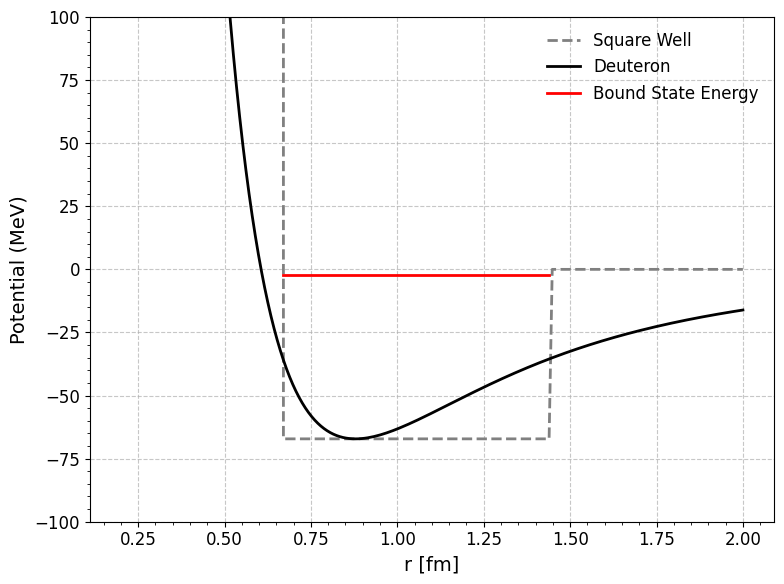

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting for publication
fig, ax = plt.subplots(figsize=(8, 6))

# Set font and font size
# plt.rcParams['font.family'] = 'Arial'  # Or 'sans-serif'
plt.rcParams['font.size'] = 12

# Plot the potentials with improved styling
ax.plot(r, potential, label='Square Well', linestyle='--', color='gray', linewidth=2)
ax.plot(r, V_deuteron, label='Deuteron', linestyle='-', color='black', linewidth=2)

def bound_state(a, c, r):
    E = np.zeros_like(r, dtype=float)  # Initialize E with zeros
    for i in range(len(r)):
        if (a < r[i]) and (r[i] < ( c)):
            E[i] = -2.221  # energy inside the well
        else:
            E[i] = 0.0  # energy outside the well
    return E
line_y = np.full(r.shape, -35.5)  # Create an array of -50 with the same shape as r

bound_E = bound_state(a, c, r)


# Extract the portion of bound_E within the well region
well_region_indices = (a < r) & (r < ( c))
bound_E_well_region = bound_E[well_region_indices]
r_well_region = r[well_region_indices]

# Plot the bound state energy within the well region
ax.plot(r_well_region, bound_E_well_region, label='Bound State Energy', linestyle='-', color='red', linewidth=2)

# ... rest of your plotting code ...
# ax.axhline(y=-2.221, color='red', linestyle='-', label='Bound State Energy', xmin=xmin, xmax=xmax)
# Customize plot elements
ax.set_xlabel('r [fm]', fontsize=14)
ax.set_ylabel('Potential (MeV)', fontsize=14)
# ax.set_title('Deuteron Potential with Square Well Approximation', fontsize=16)  # More descriptive title
ax.set_ylim(-100, 100)
#ax.set_xlim(0, 2)  # Adjust as needed

# Improve grid and legend
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(fontsize=12, loc='best', frameon=False)

# Add minor ticks for better precision
ax.minorticks_on()

# Add vertical lines for barriers (optional)
# ax.axvline(x=0, color='k', linestyle='--', label='Infinite Left Barrier')
# ax.axvline(x=a, color='k', linestyle='--', label='Right Barrier = 0')

# Tighten layout and save as PDF
plt.tight_layout()
plt.savefig('deuteron_square_well.pdf', format='pdf')  # Descriptive file name
plt.show()

# Demonstration of potential well solution is in range (optional)

0.80307205431908       -34.00000000000001
0.7919613798470791       -34.49999999999999
0.7809812219989841       -35.0
0.7701257256169742       -35.500000000000014
0.7593892434788404       -36.000000000000014
0.7487663206917012       -36.49999999999999
0.7382516799481718       -37.000000000000014
0.7278402075515285       -37.50000000000203
0.7175269401231045       -38.00000000000084
0.7073070519097002       -38.50000000000033


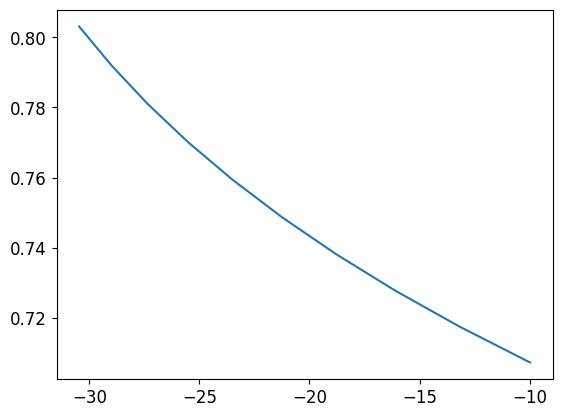

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

width = np.array([])  # Initialize width as an empty array
v_sub_array = np.array([]) # Initialize v_sub_array as an empty array


for j in range(0,10):
  v_sub = 34 + 0.5*j
  def equation_to_solve(r):
    return deuteron_potential(r) + v_sub

  # Provide an initial guess for r (e.g., 1.0)
  solution1 = fsolve(equation_to_solve, 1.25)
  solution2 = fsolve(equation_to_solve, 0.6)
  distance = solution1[0] - solution2[0]
  width = np.append(width, distance)
  v_sub_array = np.append(v_sub_array, v_sub)
  print(distance, "     ",deuteron_potential(solution1[0]))

plt.plot(deuteron_potential(width)+v_sub_array, width)
plt.show()

# Hexaquark well width and depth calculation from α ratio

In [14]:

print("Hexaquark max well depth")
print(fmin(hexaquark_potential, x0 =0.0))
min_hex = fmin(hexaquark_potential, x0 =0.0)

hex_well_width = (min_hex)* alpha
print("Square well width for hexaquark is" ,hex_well_width)

hex_well_depth = hexaquark_potential(min_hex)
print("depth of hexaquark interaction", hex_well_depth)


Hexaquark max well depth
Optimization terminated successfully.
         Current function value: -30.234646
         Iterations: 25
         Function evaluations: 50
[1.1480625]
Optimization terminated successfully.
         Current function value: -30.234646
         Iterations: 25
         Function evaluations: 50
Square well width for hexaquark is [1.00562602]
depth of hexaquark interaction [-30.2346458]


<ipython-input-6-2afecbe94a72>:35: RuntimeWarning: divide by zero encountered in divide
  return 24*(hbarc * coupling * mass_exch**2 / (4 * mass_bound**2 * 3 * r ) * np.exp(-mass_exch * r / hbarc))
<ipython-input-6-2afecbe94a72>:58: RuntimeWarning: invalid value encountered in subtract
  return + V_omega - V_sigma - V_eta


#Plot of hexaquark well and square well approximation

[-15.98099469]
width well hexaquark 0.5781655491629889


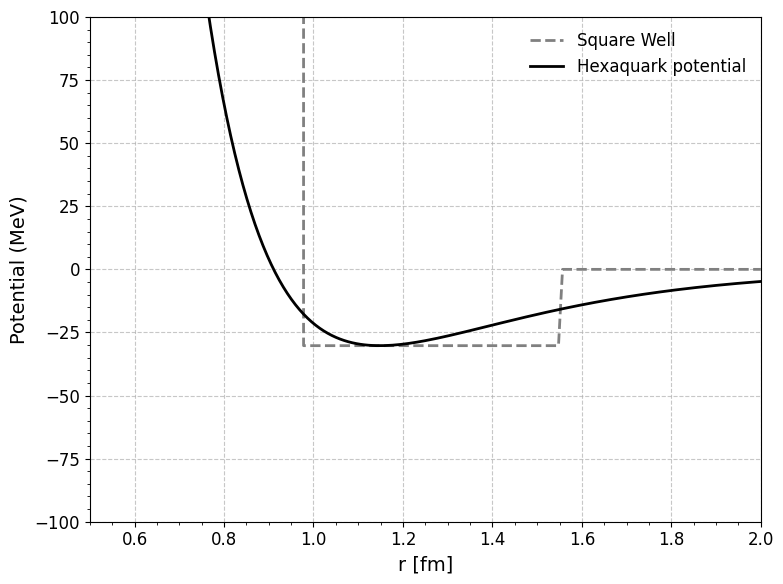

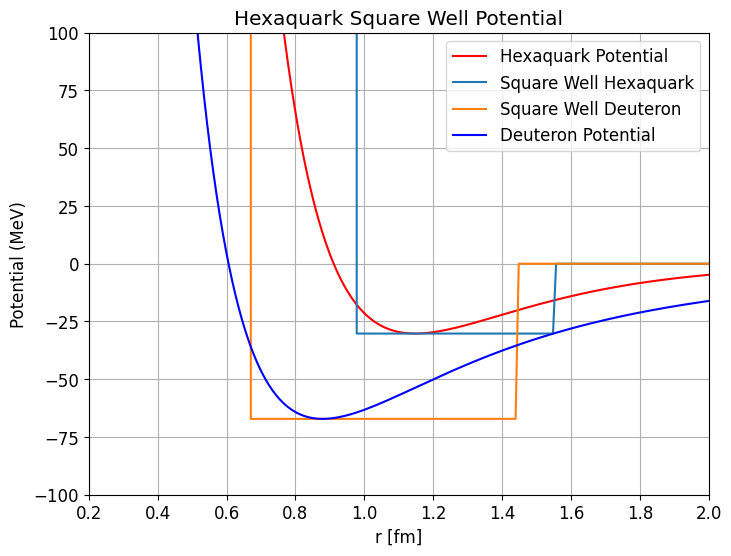

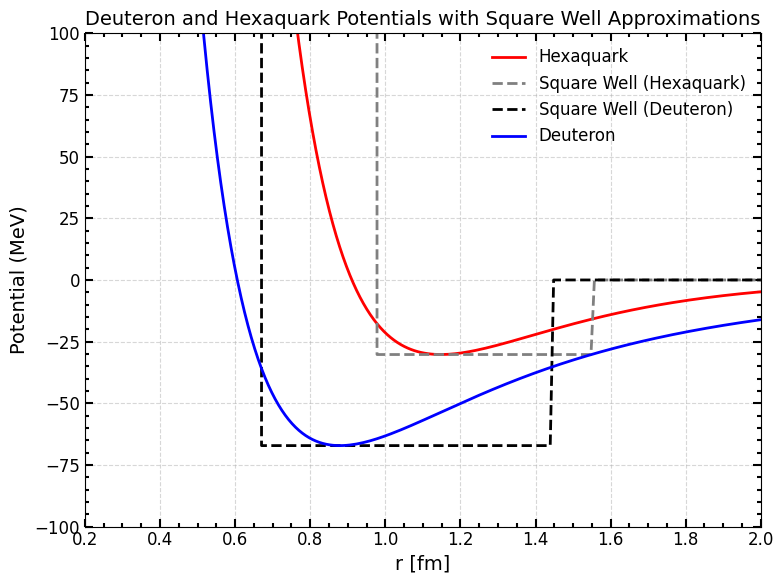

sol1 -5.777923298308991
sol2 [-5.77984125]


In [15]:
V_hex = alpha_2 * -30.234646
print(V_hex)


def equation_to_solve_hex(r):
  return hexaquark_potential(r) + 15.98099469


line_y_hex = np.full(r.shape, V_hex)

# Provide an initial guess for r (e.g., 1.0)
solution1_hex = fsolve(equation_to_solve_hex, 1.6) # Pass V_hex using a lambda function
solution2_hex = fsolve(equation_to_solve_hex, 0.9) # Pass V_hex using a lambda function
distance_hex = solution1_hex[0] - solution2_hex[0]
print("width well hexaquark", distance_hex)

# print("sol1", solution1_hex[0])
# print("sol2", solution2_hex[0])

V_hex1 = -15.98099469
# Define the potential function for the square well
def square_well_potential2(r, V_hex1, a, distance_hex):
    V = np.zeros_like(r)
    V[ r <= q] = 1000000
    V[(q < r) & (r < (q+distance_hex))] = V_hex1  # Potential inside the well
    V[r >= (q+distance_hex)] = 0.0   # Potential outside the well (right barrier 0)
    return V

p = 1.55
q = 0.97

potential_hex2 = square_well_potential2(r, -30.234646, q, distance_hex)

import numpy as np
import matplotlib.pyplot as plt

# ... (Your existing code for calculating potentials) ...

# Plotting for publication
fig, ax = plt.subplots(figsize=(8, 6))

# Set font and font size
plt.rcParams['font.family'] = 'Arial'  # Or 'sans-serif'
plt.rcParams['font.size'] = 12

# Plot the potentials with improved styling
ax.plot(r, potential_hex2, label='Square Well', linestyle='--', color='gray', linewidth=2)
ax.plot(r, V_hexaquark, label='Hexaquark potential', linestyle='-', color='black', linewidth=2)

# Customize plot elements
ax.set_xlabel('r [fm]', fontsize=14)
ax.set_ylabel('Potential (MeV)', fontsize=14)
ax.set_xlim(0.5, 2)
ax.set_ylim(-100, 100)

# Improve grid and legend
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(fontsize=12, loc='best', frameon=False)

# Add minor ticks for better precision
ax.minorticks_on()

# Tighten layout and save as PDF
plt.tight_layout()
plt.savefig('hexaquark_square_well.pdf', format='pdf')  # Descriptive file name
plt.show()

# Define the potential function for the square well
def square_well_potential1(r, V_0, a, b):
    V = np.zeros_like(r)
    V[ r <= a] = 1000000
    V[(a < r) & (r < (a+b))] = V_0  # Potential inside the well
    V[r >= (a+b)] = 0.0   # Potential outside the well (right barrier 0)
    return V


# Parameters for the square well of given width
a = 0.92852
c = a + 1.00562602

potential_hex1 = square_well_potential1(r, hex_well_depth, a, hex_well_width)

plt.figure(figsize=(8, 6))
# plt.plot(r, line_y_hex, label = 'Line')
plt.plot(r, V_hexaquark, color ='red', label='Hexaquark Potential')
plt.plot(r, potential_hex2, label = 'Square Well Hexaquark')
plt.plot(r, potential, label = 'Square Well Deuteron')
# plt.plot(r, potential_hex1, label = 'Square Well 2, α=0.87')
plt.plot(r, V_deuteron,color ='blue', label='Deuteron Potential')
# plt.plot(r, equation_to_solve_hex(r, V_hex))
plt.xlabel('r [fm]')
plt.ylabel('Potential (MeV)')
plt.title('Hexaquark Square Well Potential')
plt.legend()
plt.grid(True)
plt.ylim(-100, 100)
plt.xlim(0.2, 2)
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))

# Set font and font size
plt.rcParams['font.family'] = 'Arial'  # Or 'sans-serif'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1.5

# Plot the potentials with improved styling
ax.plot(r, V_hexaquark, color='red', label='Hexaquark', linestyle='-', linewidth=2)
ax.plot(r, potential_hex2, label='Square Well (Hexaquark)', linestyle='--', color='gray', linewidth=2)
ax.plot(r, potential, label='Square Well (Deuteron)', linestyle='--', color='black', linewidth=2)  # Added Deuteron square well
ax.plot(r, V_deuteron, color='blue', label='Deuteron', linestyle='-', linewidth=2)

# Customize plot elements
ax.set_xlabel('r [fm]', fontsize=14)
ax.set_ylabel('Potential (MeV)', fontsize=14)
ax.set_title('Deuteron and Hexaquark Potentials with Square Well Approximations', fontsize=14)  # More descriptive title
ax.set_ylim(-100, 100)
ax.set_xlim(0.2, 2)

ax.grid(True, linestyle='--', alpha=0.5, linewidth=0.8)
ax.legend(fontsize=12, loc='best', frameon=False, handlelength=2)


ax.minorticks_on()
ax.tick_params(which='both', direction='in', top=True, right=True, width=1.5, length=6)
ax.tick_params(which='minor', direction='in', top=True, right=True, width=1.5, length=3)


plt.tight_layout()
plt.savefig('deuteron_hexaquark_square_wells.pdf', format='pdf', dpi=600)  # Descriptive file name
plt.show()

#Confirmation of symmetry in well values
print("sol1", hexaquark_potential(a))
print("sol2", hexaquark_potential(a+hex_well_width))